In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
df = pd.read_csv('../../data/AloQuote_wide.csv', index_col=0)
df.shape

(401, 169)

In [3]:
df

,2007-05-31,2007-06-30,2007-07-31,2007-08-31,2007-09-30,2007-10-31,2007-11-30,2007-12-31,2008-01-31,2008-02-29,...,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31
1001,12.7,12.2,12.5,12.3,11.7,11.2,10.8,10.7,11.6,11.5,...,9.6,9.1,8.7,8.7,8.8,9.4,9.2,9.1,9.1,8.9
1002,12.4,12.1,12.5,12.8,12.1,11.7,11.4,11.4,11.9,12.0,...,9.2,8.9,8.7,8.4,8.3,8.7,8.7,8.6,8.7,8.3
1003,12.8,12.7,12.9,12.9,12.7,12.4,12.3,12.4,12.8,12.7,...,8.6,8.3,8.2,8.1,8.2,8.7,8.8,8.9,8.9,8.6
1004,11.1,11.2,11.6,11.5,10.9,10.9,10.7,10.8,11.4,11.1,...,9.4,9.3,9.2,9.1,9.1,9.5,9.8,9.6,9.4,9.1
1051,9.9,9.5,9.7,9.7,9.0,8.8,9.2,9.6,10.7,10.6,...,6.2,5.8,5.7,5.8,6.2,6.8,6.9,6.6,6.4,6.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16073,13.1,12.6,12.2,12.1,11.3,11.0,11.1,11.5,12.7,12.6,...,6.0,5.8,5.8,5.7,5.9,6.5,6.6,6.5,6.3,6.0
16074,11.2,10.6,10.3,10.4,10.1,9.8,9.3,9.9,11.6,11.3,...,4.8,4.5,4.5,4.3,4.5,5.0,5.1,5.0,4.7,4.6
16075,10.9,9.9,10.0,10.0,9.3,9.1,9.1,9.9,11.4,11.3,...,5.1,4.8,4.6,4.7,4.9,5.5,5.5,5.3,5.0,4.8
16076,13.1,12.5,12.5,12.5,11.7,11.2,11.0,11.8,13.4,13.1,...,5.5,5.3,5.1,5.0,5.0,5.6,5.6,5.4,5.1,4.9


In [27]:
df.columns = pd.to_datetime(df.columns)

In [28]:
df.columns

DatetimeIndex(['2007-05-31', '2007-06-30', '2007-07-31', '2007-08-31',
               '2007-09-30', '2007-10-31', '2007-11-30', '2007-12-31',
               '2008-01-31', '2008-02-29',
               ...
               '2020-08-31', '2020-09-30', '2020-10-31', '2020-11-30',
               '2020-12-31', '2021-01-31', '2021-02-28', '2021-03-31',
               '2021-04-30', '2021-05-31'],
              dtype='datetime64[ns]', length=169, freq=None)

In [54]:
num_pred = 3

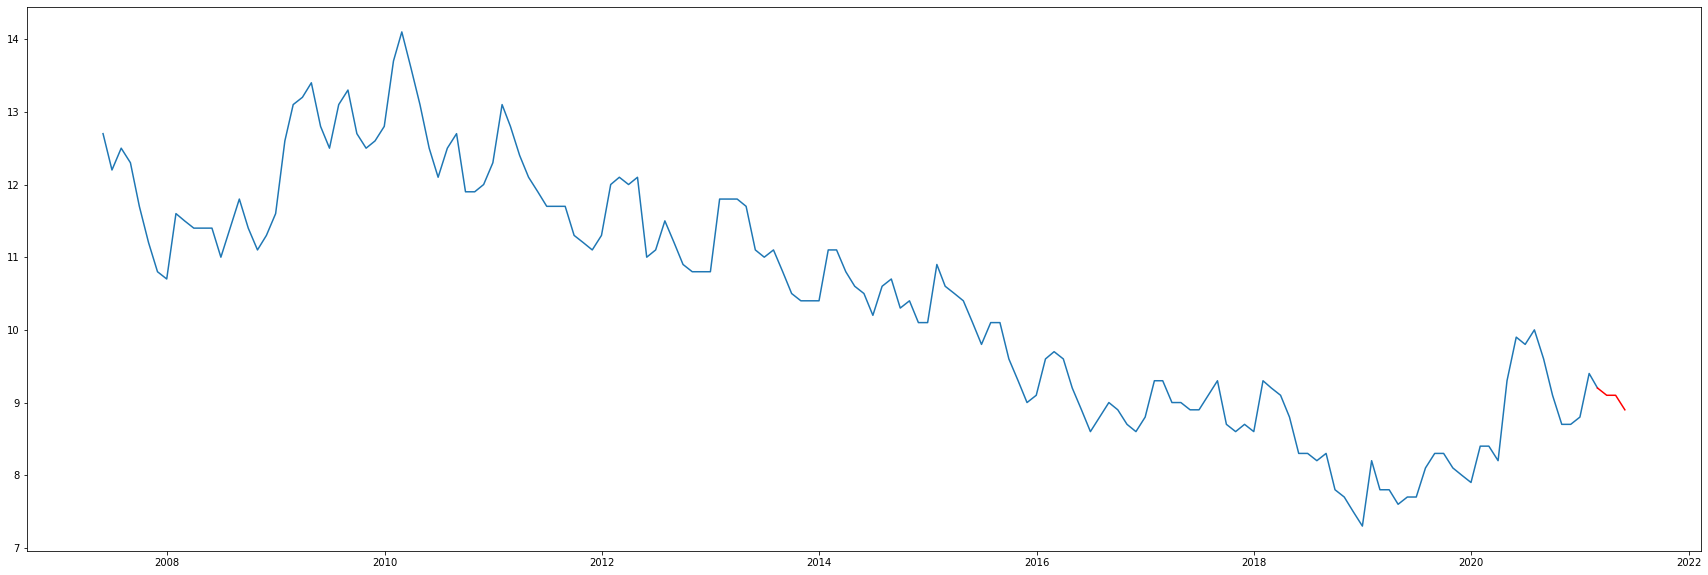

In [65]:
fig, ax = plt.subplots(figsize=(30,10))
plt.plot(df[df.columns[:-num_pred]].loc[1001])
plt.plot(df[df.columns[-(num_pred+1):]].loc[1001], 'r')

In [140]:
def plot_line_wide(df, filter_kreis, filter_date, num_pred):
    '''
    Input data: columns are dates
    '''
    fig, ax = plt.subplots(figsize=(30,10))
    filter_col = df.columns[df.columns>df.columns[filter_date]]
    filter_df = df[filter_col]
    for kreis in filter_kreis:
        plt.plot(filter_df[filter_df.columns[:-num_pred]].loc[kreis], label=kreis)
        plt.plot(filter_df[filter_df.columns[-(num_pred+1):]].loc[kreis], 'r')
    plt.axvline(x=df.columns[-(num_pred+1)], alpha=0.2, linestyle='--')
    ax.legend()
    #return fig

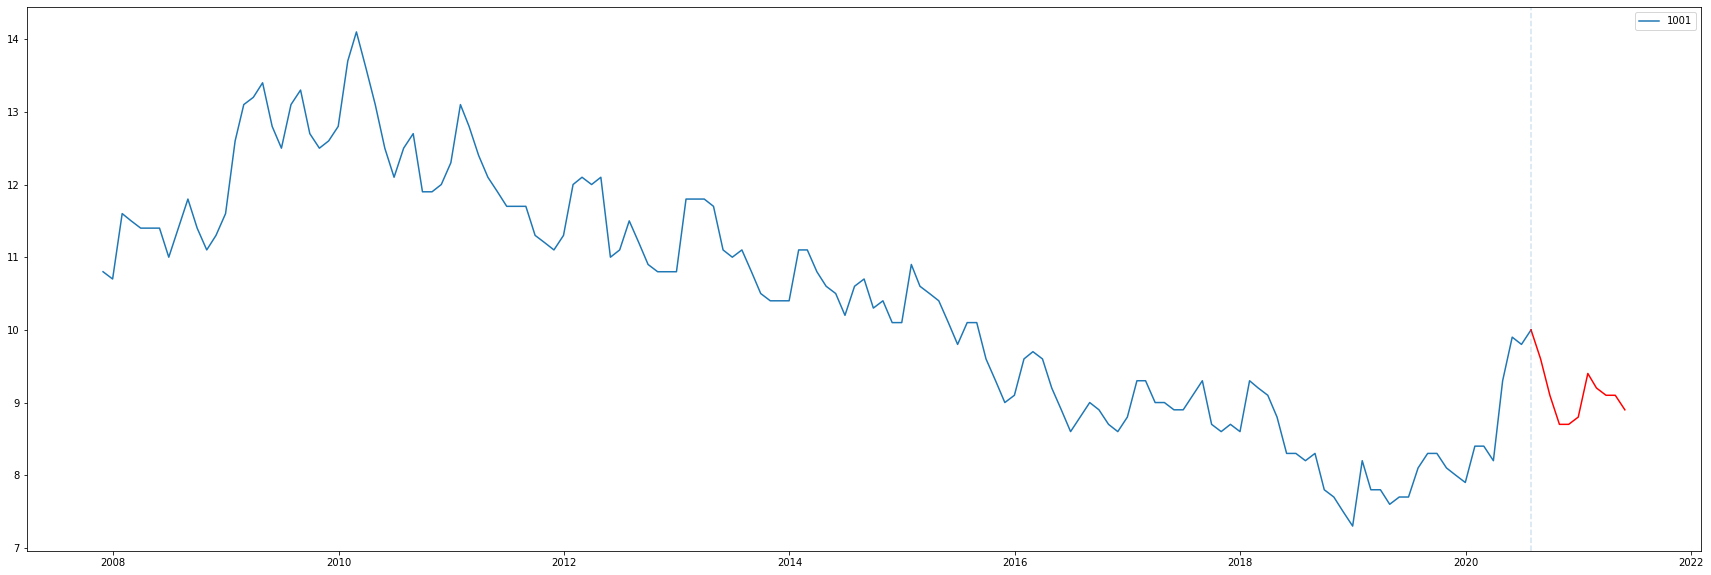

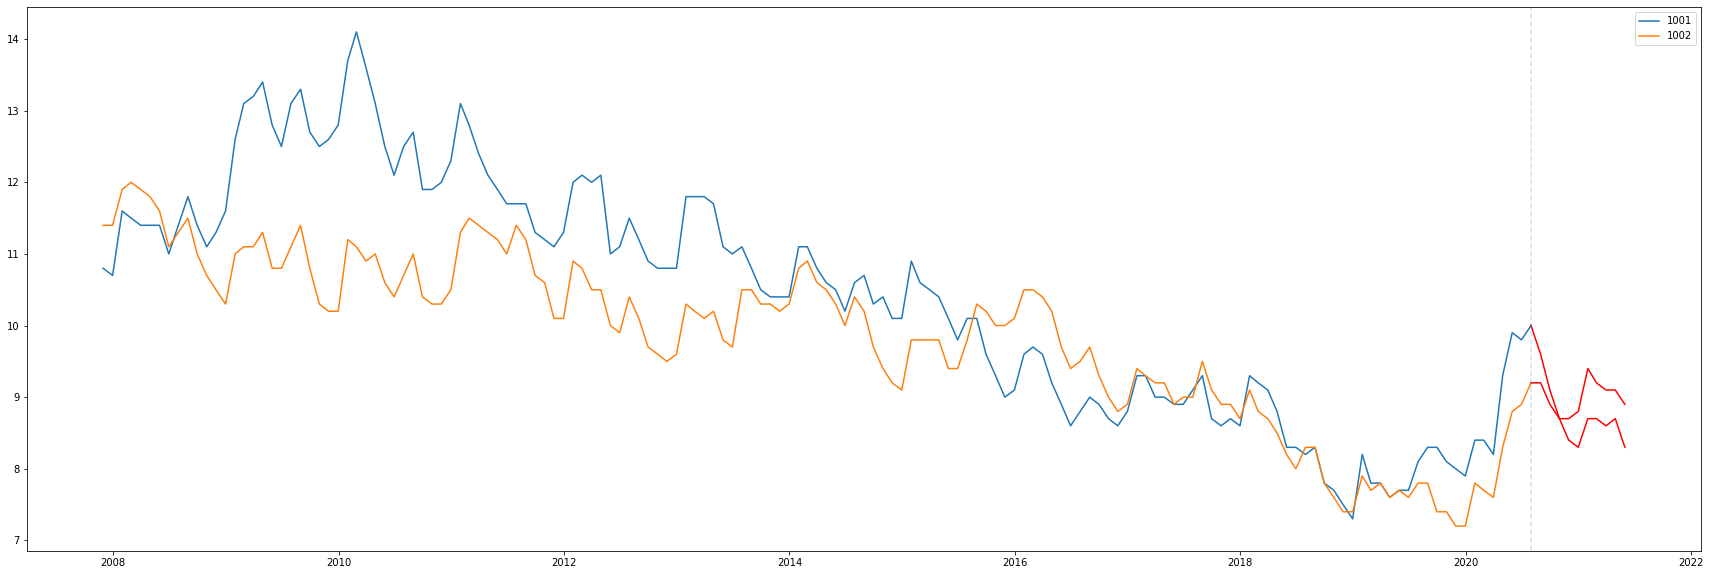

In [141]:
plot_line_wide(df, [1001], 5, 10)
plot_line_wide(df, [1001, 1002], 5, 10)